In [1]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train-mix-viral',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
validation = tf.keras.preprocessing.image_dataset_from_directory(
    '../Data/classification_data/train-mix-viral',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 26070 files belonging to 4 classes.
Using 20856 files for training.
Found 26070 files belonging to 4 classes.
Using 5214 files for validation.


In [3]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(4, activation= 'softmax')
])

In [4]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
## fit model
history=model.fit(train_data,validation_data= validation,batch_size=32,epochs = 20,callbacks=[early])

Epoch 1/20
652/652 [==============================] - 1317s 2s/step - loss: 0.6749 - accuracy: 0.7736 - val_loss: 0.4355 - val_accuracy: 0.8460
Epoch 2/20
652/652 [==============================] - 1294s 2s/step - loss: 0.3803 - accuracy: 0.8600 - val_loss: 0.3469 - val_accuracy: 0.8746
Epoch 3/20
652/652 [==============================] - 1288s 2s/step - loss: 0.3019 - accuracy: 0.8897 - val_loss: 0.3411 - val_accuracy: 0.8746
Epoch 4/20
652/652 [==============================] - 1230s 2s/step - loss: 0.2472 - accuracy: 0.9080 - val_loss: 0.3524 - val_accuracy: 0.8748
Epoch 5/20
652/652 [==============================] - 1205s 2s/step - loss: 0.1997 - accuracy: 0.9275 - val_loss: 0.3194 - val_accuracy: 0.8911
Epoch 6/20
652/652 [==============================] - 1010s 2s/step - loss: 0.1761 - accuracy: 0.9352 - val_loss: 0.3507 - val_accuracy: 0.8926
Epoch 7/20
652/652 [==============================] - 791s 1s/step - loss: 0.1368 - accuracy: 0.9492 - val_loss: 0.3853 - val_accuracy: 

In [7]:
model.save('models/blended_viral_data')

INFO:tensorflow:Assets written to: models/blended_viral_data/assets


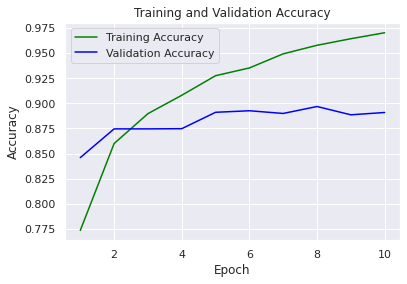

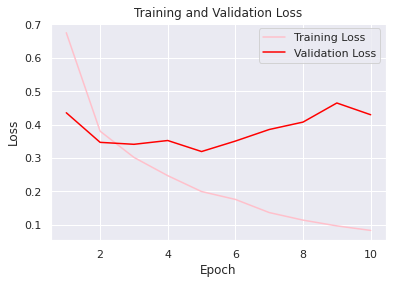

In [8]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

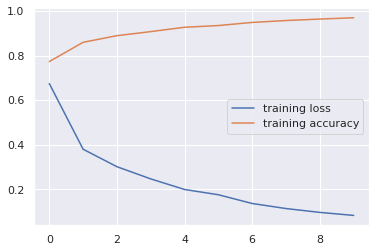

In [9]:
#training accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

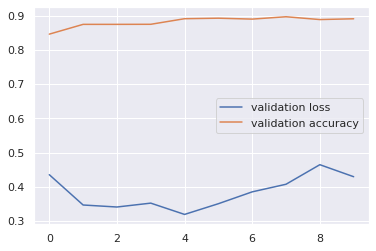

In [10]:
#validation accuracy and loss
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [11]:
import os
import glob

class_names =  ["COVID-19","Lung","NORMAL","Viral Pneumonia"]

In [16]:
pred_list = np.zeros((250,4))

In [17]:
#model = keras.models.load_model('models/blended_lung_data')
label_names= ["COVID", "Lung", "Normal", "Viral"]

In [18]:
for idx, label in enumerate(label_names):
    path_list = sorted(glob.glob(os.path.join("../Data/classification_data/test", label, "*.png")))
    print("testing %d %s CXR images" %(len(path_list), label))

    for i in range(len(path_list)):
        image_path = path_list[i]
        new_img = image.load_img(image_path, target_size=(256, 256))
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        prediction = np.argmax(prediction,axis=1)
        pred_list[i,idx] = prediction

testing 250 COVID CXR images
testing 250 Lung CXR images
testing 250 Normal CXR images
testing 250 Viral CXR images


In [19]:
pred_list

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 1., 3.],
       [0., 1., 2., 1.],
       [0., 1., 2., 0.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 1., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 0.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [1., 1., 2., 3.],
       [2., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 0., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 1., 3.],
       [0., 1., 2., 3.],
       [2., 1., 2., 1.],
       [0., 1., 3., 3.],
       [0., 1., 2., 3.],
       [0., 2., 2., 3.],
       [0., 1., 1., 3.],
       [0., 1., 2., 3.],


In [20]:
df = pd.DataFrame(pred_list)

In [21]:
df.columns = class_names

In [22]:
df.to_csv("classification_blended_viral7k.csv")

In [23]:
label = np.zeros((250,4))

In [24]:
label[:,0] = 0
label[:,1] = 1
label[:,2] = 2
label[:,3] = 3

In [25]:
label = pd.DataFrame(label)
label.columns = class_names

In [26]:
#label

In [27]:
(df == label).sum(axis = 0)/250

COVID-19           0.944
Lung               0.804
NORMAL             0.876
Viral Pneumonia    0.948
dtype: float64